### Import Libraries

In [94]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [43]:
df = pd.read_csv('../../data/traditional_preprocessed_data.csv')
df.head()

,Comment,Sentiment,Language
0,맛있 분위기 좋 어요 ! 야외 에서 식사 가능 어서 날씨 좋 으면 더 좋 어요,1,ko
1,어느 수산 시장 에서 나 나오 면 먹 수 있 민어 . 맛집 서비스 업종 역사 상 최...,0,ko
2,wow wow funki littl fleet sassi,1,en
3,invent origin purpos british thing ever saw today,1,en
4,양 푸짐 소스 모자라 면 리필 가능 어서 좋 어요 . 명 먹 기 좀 많 양 나 먹 ...,1,ko


In [44]:
print(df["Comment"].isnull().sum())
df = df.dropna(subset=["Comment"])
df["Sentiment"].value_counts()

32


Sentiment
1    99989
0    99979
Name: count, dtype: int64

In [45]:
df_copy = df.copy()

### Train test split

In [46]:
X = df["Comment"]
y = df["Sentiment"]

In [47]:
X.shape, y.shape

((199968,), (199968,))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((159974,), (39994,), (159974,), (39994,))

### TF-iDF 

In [50]:
tf_idf = TfidfVectorizer()

In [51]:
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

## Model Training

### Logistic Regression



In [52]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#### Test and Test Evaluation

In [53]:
# Test evaluation
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87     20128
           1       0.88      0.84      0.86     19866

    accuracy                           0.87     39994
   macro avg       0.87      0.87      0.87     39994
weighted avg       0.87      0.87      0.87     39994



In [54]:
# Train evaluation
y_pred = log_reg.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89     79851
           1       0.91      0.87      0.89     80123

    accuracy                           0.89    159974
   macro avg       0.89      0.89      0.89    159974
weighted avg       0.89      0.89      0.89    159974



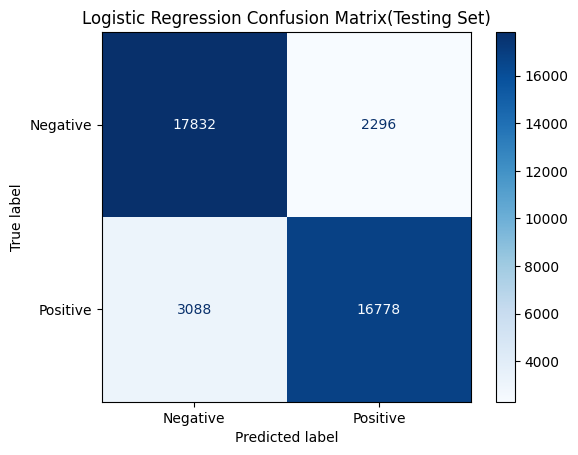

In [55]:
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_test, y_test, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Logistic Regression Confusion Matrix(Testing Set)")
plt.show()

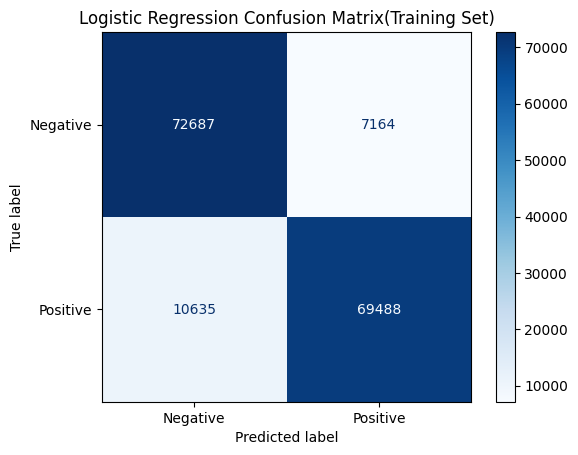

In [56]:
ConfusionMatrixDisplay.from_estimator(
    log_reg, X_train, y_train, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Logistic Regression Confusion Matrix(Training Set)")
plt.show()

### SVM

In [57]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [58]:
# Test evaluation
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     20128
           1       0.87      0.85      0.86     19866

    accuracy                           0.86     39994
   macro avg       0.86      0.86      0.86     39994
weighted avg       0.86      0.86      0.86     39994



In [59]:
# Train evaluation
y_pred = svm.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     79851
           1       0.93      0.92      0.93     80123

    accuracy                           0.93    159974
   macro avg       0.93      0.93      0.93    159974
weighted avg       0.93      0.93      0.93    159974



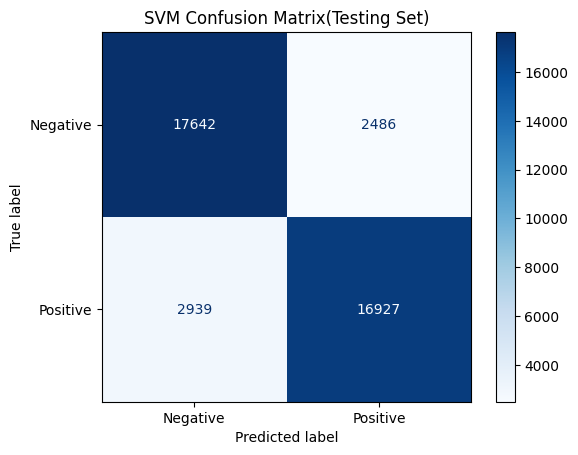

In [60]:
ConfusionMatrixDisplay.from_estimator(
    svm, X_test, y_test, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("SVM Confusion Matrix(Testing Set)")
plt.show()

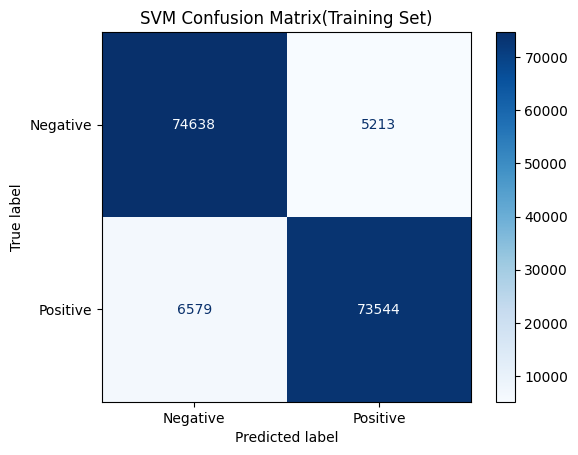

In [61]:
ConfusionMatrixDisplay.from_estimator(
    svm, X_train, y_train, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("SVM Confusion Matrix(Training Set)")
plt.show()

### Naive Bayes

In [62]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [63]:
# Test evaluation
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     20128
           1       0.86      0.84      0.85     19866

    accuracy                           0.85     39994
   macro avg       0.85      0.85      0.85     39994
weighted avg       0.85      0.85      0.85     39994



In [64]:
# Train evaluation
y_pred = nb.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     79851
           1       0.88      0.87      0.87     80123

    accuracy                           0.88    159974
   macro avg       0.88      0.88      0.88    159974
weighted avg       0.88      0.88      0.88    159974



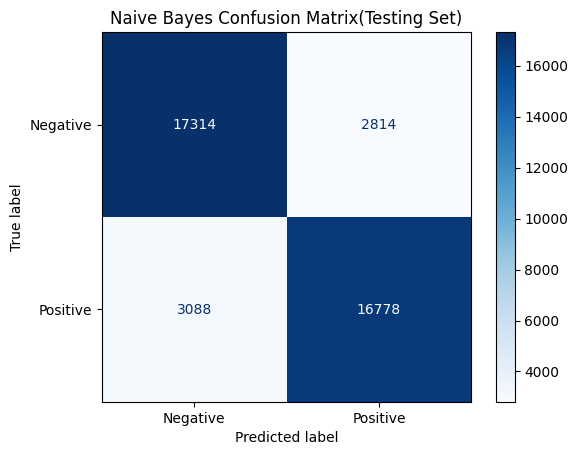

In [65]:
ConfusionMatrixDisplay.from_estimator(
    nb, X_test, y_test, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Naive Bayes Confusion Matrix(Testing Set)")
plt.show()

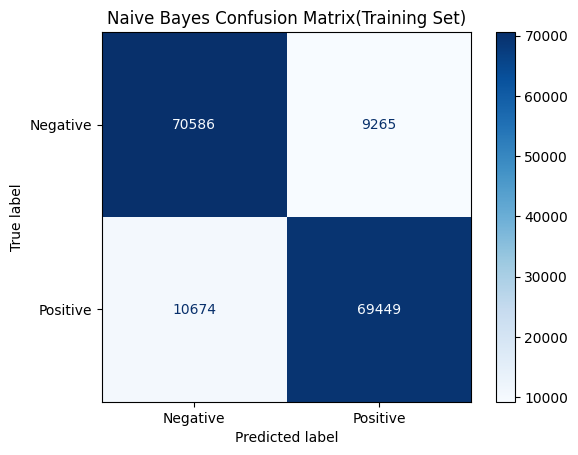

In [66]:
ConfusionMatrixDisplay.from_estimator(
    nb, X_train, y_train, display_labels=["Negative", "Positive"], cmap="Blues"
)
plt.title("Naive Bayes Confusion Matrix(Training Set)")
plt.show()

### English Only

In [67]:
df_en = df_copy[df_copy["Language"] == "en"]
df_en.head()

,Comment,Sentiment,Language
2,wow wow funki littl fleet sassi,1,en
3,invent origin purpos british thing ever saw today,1,en
5,feel sorri guy tell bulli teas `` jock '' chil...,0,en
7,'ve never heard someon talk beauti mathemat le...,1,en
10,unshak fearless. could use us,1,en


In [68]:
X = df_en["Comment"]
y = df_en["Sentiment"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
tf_idf = TfidfVectorizer()

In [71]:
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

In [72]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [73]:
# Test evaluation
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82     10012
           1       0.85      0.77      0.80      9982

    accuracy                           0.81     19994
   macro avg       0.82      0.81      0.81     19994
weighted avg       0.82      0.81      0.81     19994



In [74]:
# Train evaluation
y_pred = log_reg.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     39967
           1       0.88      0.81      0.84     40007

    accuracy                           0.85     79974
   macro avg       0.85      0.85      0.85     79974
weighted avg       0.85      0.85      0.85     79974



In [75]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [76]:
# Test evaluation
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.81     10012
           1       0.82      0.79      0.81      9982

    accuracy                           0.81     19994
   macro avg       0.81      0.81      0.81     19994
weighted avg       0.81      0.81      0.81     19994



In [77]:
# Train evaluation
y_pred = svm.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     39967
           1       0.92      0.88      0.90     40007

    accuracy                           0.90     79974
   macro avg       0.90      0.90      0.90     79974
weighted avg       0.90      0.90      0.90     79974



In [78]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [79]:
# Test evaluation
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81     10012
           1       0.84      0.76      0.80      9982

    accuracy                           0.81     19994
   macro avg       0.81      0.81      0.81     19994
weighted avg       0.81      0.81      0.81     19994



In [80]:
# Train evaluation
y_pred = nb.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85     39967
           1       0.87      0.81      0.84     40007

    accuracy                           0.85     79974
   macro avg       0.85      0.85      0.85     79974
weighted avg       0.85      0.85      0.85     79974



## Korean Only


In [81]:
df_ko = df_copy[df_copy["Language"] == "ko"]
df_ko.head()

,Comment,Sentiment,Language
0,맛있 분위기 좋 어요 ! 야외 에서 식사 가능 어서 날씨 좋 으면 더 좋 어요,1,ko
1,어느 수산 시장 에서 나 나오 면 먹 수 있 민어 . 맛집 서비스 업종 역사 상 최...,0,ko
4,양 푸짐 소스 모자라 면 리필 가능 어서 좋 어요 . 명 먹 기 좀 많 양 나 먹 ...,1,ko
6,맛 고장 이런 식당 있 것 불가사의 ᆷ ..,0,ko
8,평점 0 점 왜 없 거 죠 ... 맛 집 라 어서 꾸불꾸불 산길 비 포장도로 따르 ...,0,ko


In [82]:
X = df_ko["Comment"]
y = df_ko["Sentiment"]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [84]:
tf_idf = TfidfVectorizer()

In [85]:
X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

In [86]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [87]:
# Test evaluation
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10108
           1       0.92      0.92      0.92      9892

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [88]:
# Train evaluation
y_pred = log_reg.predict(X_train)
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93     39892
           1       0.93      0.93      0.93     40108

    accuracy                           0.93     80000
   macro avg       0.93      0.93      0.93     80000
weighted avg       0.93      0.93      0.93     80000



In [89]:
svm = LinearSVC()
svm.fit(X_train, y_train)

LinearSVC()

In [90]:
# Test evaluation
y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92     10108
           1       0.91      0.92      0.92      9892

    accuracy                           0.92     20000
   macro avg       0.92      0.92      0.92     20000
weighted avg       0.92      0.92      0.92     20000



In [91]:
# Train evaluation
y_pred = svm.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     39892
           1       0.95      0.96      0.96     40108

    accuracy                           0.96     80000
   macro avg       0.96      0.96      0.96     80000
weighted avg       0.96      0.96      0.96     80000



In [92]:
nb = MultinomialNB()
nb.fit(X_train, y_train)

MultinomialNB()

In [93]:
# Test evaluation
y_pred = nb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     10108
           1       0.87      0.94      0.90      9892

    accuracy                           0.90     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       0.90      0.90      0.90     20000

